<a href="https://colab.research.google.com/github/PinkOrangeSapphire/229352/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

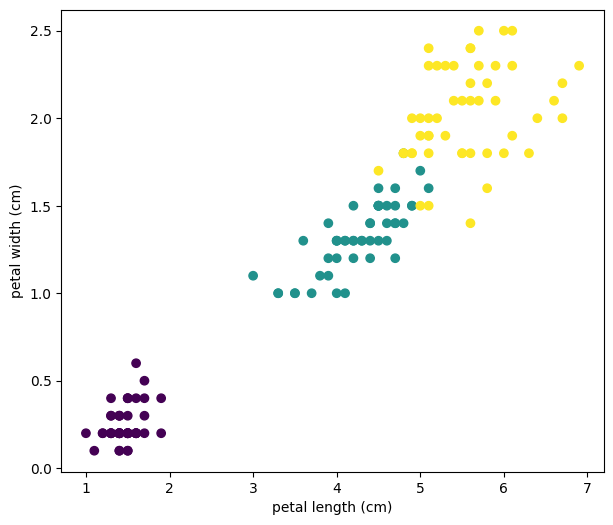

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

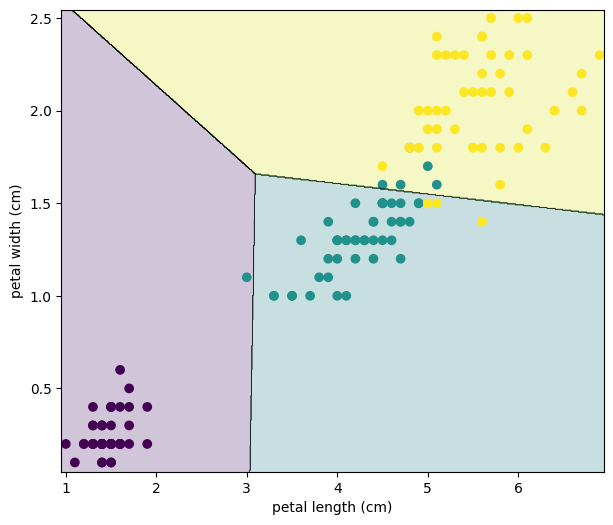

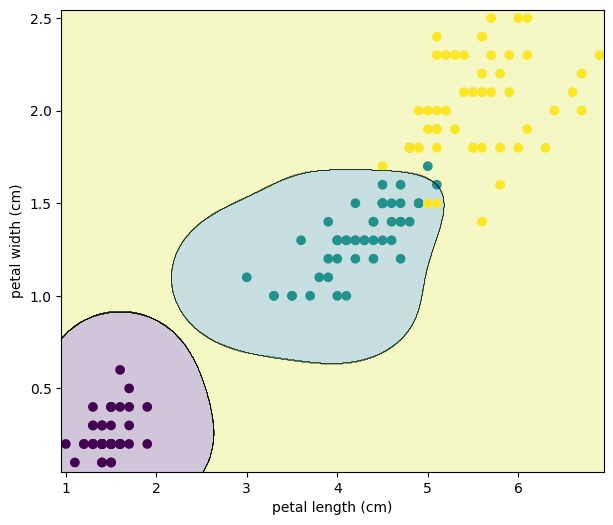

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# split data (different ratio & random_state)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -------- Linear SVM (with scaling) --------
linear_svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C=0.5, max_iter=10000))
])

linear_svm_model.fit(X_tr, y_tr)
plot_decision_boundary(linear_svm_model, X, y)

# -------- RBF SVM (with scaling) --------
rbf_svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(C=1.0, kernel='rbf', gamma=5))
])

rbf_svm_model.fit(X_tr, y_tr)
plot_decision_boundary(rbf_svm_model, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

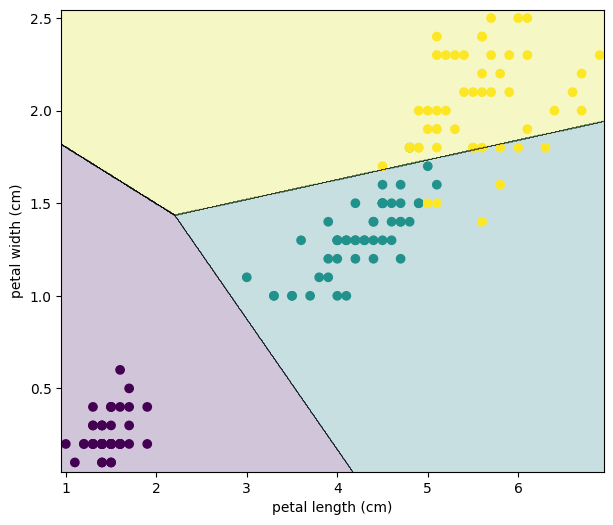

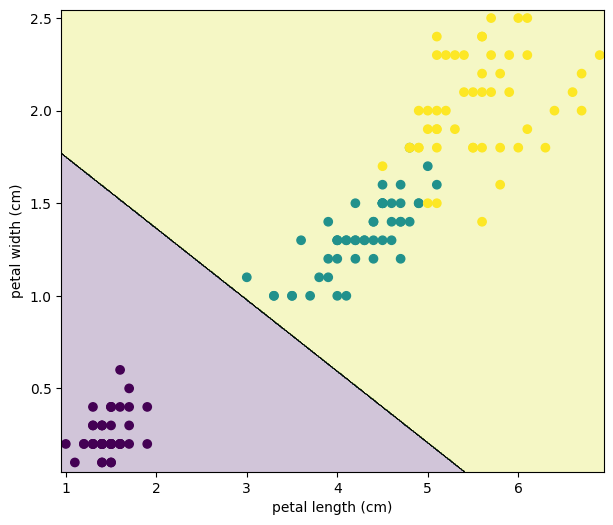

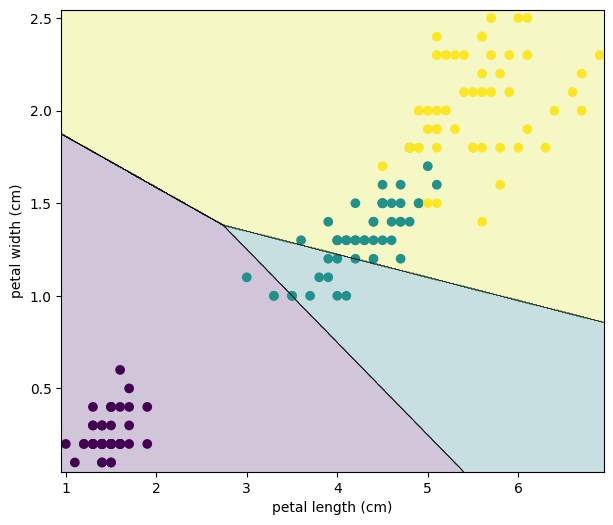

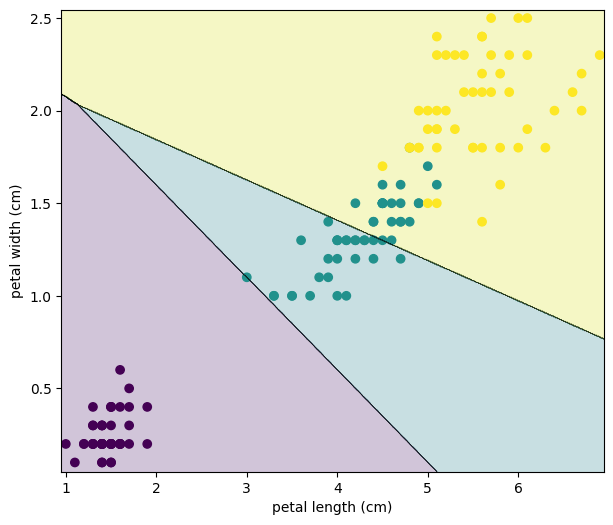

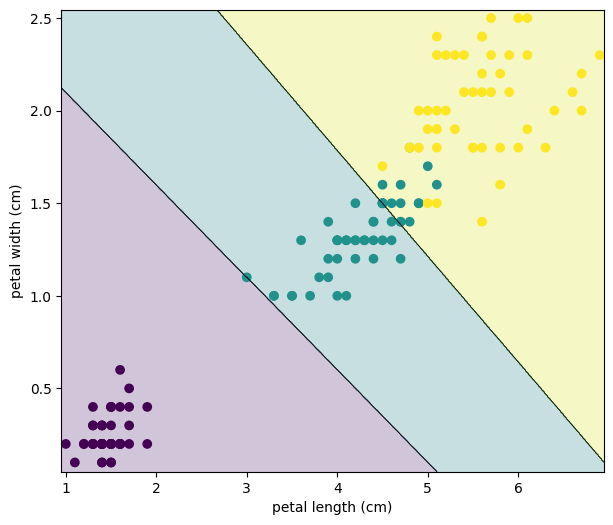

In [10]:
#TODO

C_values = [0.01, 0.1, 1, 10, 100]

models = {}

for C in C_values:
    model = LinearSVC(C=C, loss='hinge', max_iter=100000)
    model.fit(X_train, y_train)

    models[f"LinearSVM_C{C}"] = model
    plot_decision_boundary(model, X, y)


The parameter C controls how much the SVM penalizes classification errors. When C is small, the model allows more misclassifications and focuses on finding a wider, smoother margin, leading to a simpler decision boundary. When C is large, the model strongly penalizes errors, resulting in a narrower margin and a more complex decision boundary that fits the training data more closely.

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [14]:
#TODO
linear_svm_c1 = LinearSVC(C=1.0, loss='hinge', max_iter=100000)
linear_svm_c1.fit(X_tr, y_tr)
print("LinearSVC model with C=1.0 trained successfully.")

y_pred = linear_svm_c1.predict(X_te)
test_accuracy = accuracy_score(y_te, y_pred)
test_error = 1 - test_accuracy

print(f"Test error for LinearSVC (C=1.0): {test_error:.4f}")

LinearSVC model with C=1.0 trained successfully.
Test error for LinearSVC (C=1.0): 0.1842



*   A LinearSVC model was successfully trained using the specified parameters: `C=1.0`, `loss='hinge'`, and `max_iter=100000`.
*   The model achieved a test error of approximately 0.1842 when evaluated on the test dataset.

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

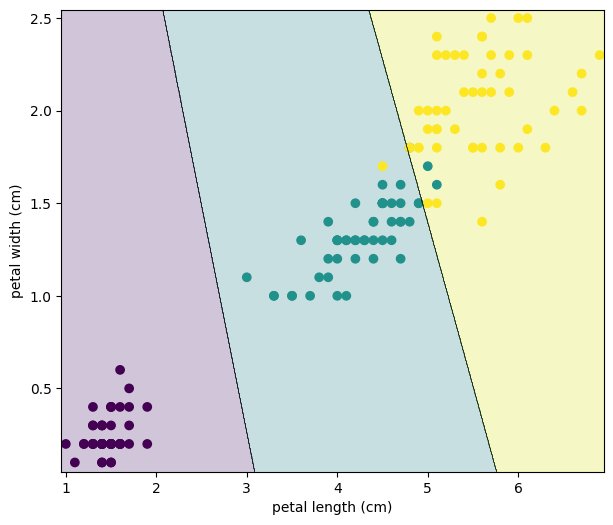

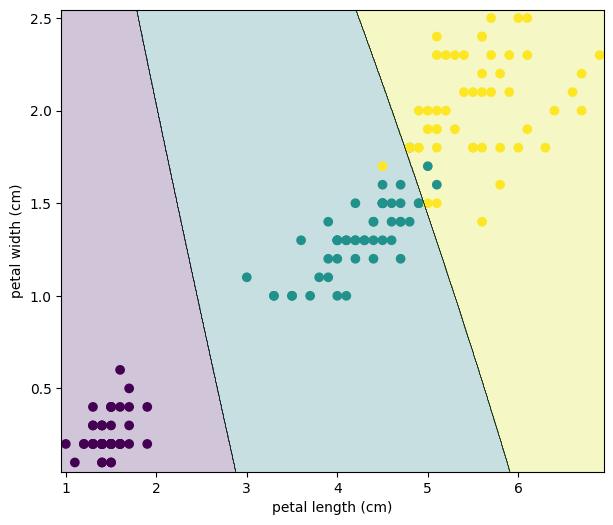

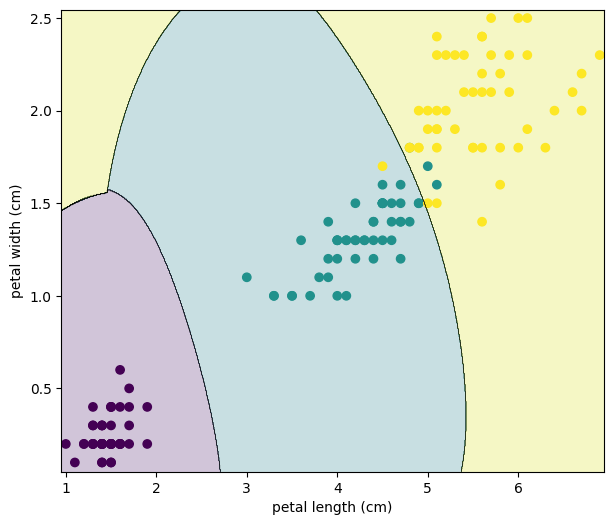

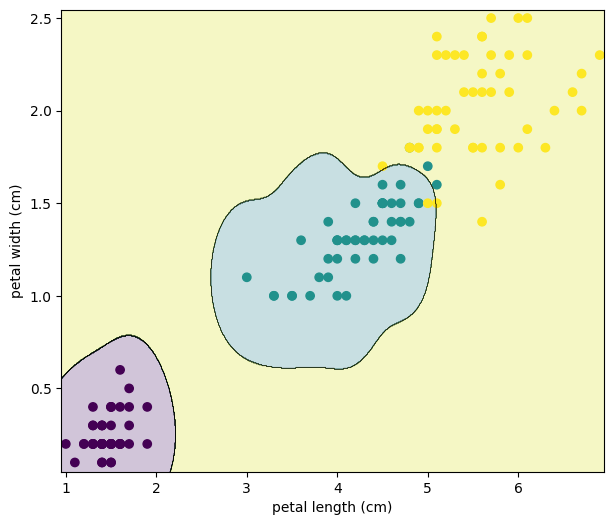

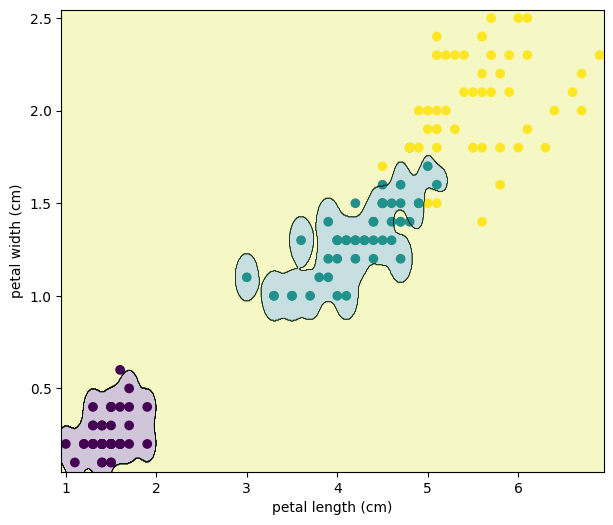

In [15]:
#TODO
# C = 1.0
svm001 = SVC(C=1.0, kernel='rbf', gamma=0.01, max_iter=100000)
svm001.fit(X_train, y_train)
plot_decision_boundary(svm001, X, y)

svm01 = SVC(C=1.0, kernel='rbf', gamma=0.1, max_iter=100000)
svm01.fit(X_train, y_train)
plot_decision_boundary(svm01, X, y)

svm1 = SVC(C=1.0, kernel='rbf', gamma=1.0, max_iter=100000)
svm1.fit(X_train, y_train)
plot_decision_boundary(svm1, X, y)

svm10 = SVC(C=1.0, kernel='rbf', gamma=10.0, max_iter=100000)
svm10.fit(X_train, y_train)
plot_decision_boundary(svm10, X, y)

svm100 = SVC(C=1.0, kernel='rbf', gamma=100.0, max_iter=100000)
svm100.fit(X_train, y_train)
plot_decision_boundary(svm100, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [16]:
#TODO

# choose gamma
svm_gamma1 = SVC(C=1.0, kernel='rbf', gamma=1.0, max_iter=100000)
svm_gamma1.fit(X_train, y_train)

# prediction
y_pred = svm_gamma1.predict(X_test)

# test error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

# number of support vectors
num_support_vectors = svm_gamma1.n_support_.sum()

print("Test error:", test_error)
print("Number of support vectors:", num_support_vectors)


Test error: 0.0
Number of support vectors: 27


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [ ]:
#TODO



For the classification of the Iris data, the Kernel SVM is preferred over the Linear SVM. Based on the test results, the Kernel SVM achieves a higher test accuracy than the Linear SVM, indicating that it generalizes better to unseen data. This suggests that the relationship between features in the Iris dataset is not perfectly linear, and a nonlinear model can capture the underlying structure more effectively.

From the decision boundary plots, the Linear SVM produces a straight-line boundary that cannot fully separate the classes, leading to some misclassifications. In contrast, the Kernel SVM generates a curved and more flexible decision boundary that better follows the data distribution and separates the classes more accurately. Therefore, considering both test accuracy and the decision boundary visualization, the Kernel SVM is more suitable for classifying the Iris dataset.